In [2]:
"""
Ryan Shuhart
MSDS 7330 - 402
November 2, 2015

resources:
http://pandas.pydata.org/pandas-docs/version/0.16.2/io.html#io-read-csv-table
http://stackoverflow.com/questions/30408450/python-long-string-on-multiple-line

Q1
https://www.youtube.com/watch?v=CNQet_kL8z4

Q2
http://learnpythonthehardway.org/book/ex39.html

Q3
http://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it
http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline

Q4
http://stackoverflow.com/questions/30970342/remove-punctuation-from-a-list
https://docs.python.org/3/tutorial/controlflow.html
http://docs.sqlalchemy.org/en/latest/dialects/sqlite.html#module-sqlalchemy.dialects.sqlite.pysqlite
https://www.sqlite.org/datatype3.html
http://stackoverflow.com/questions/9758450/pandas-convert-dataframe-to-array-of-tuples
2DS 11.5 Demonstration of Python Database Access by Prof. Tyler Moore
http://stackoverflow.com/questions/21287624/pandas-dataframe-column-type-conversion
"""
import pandas as pd
from collections import defaultdict


#import text list as a pandas data frame.  Using pandas because of my familiarity with it.
scrabble = pd.read_csv(r"C:\Users\ryan.shuhart\Google Drive\SMU\Class Work\Fall 2015"\
                    "\File Organization and Database Management\Homeworks\HW4\ospd.txt",
                    header=None, names=['Word'])

In [3]:
scrabble.head()

,Word
0,aa
1,aah
2,aahed
3,aahing
4,aahs


In [4]:
#Questions #1-3

#Define function to 
def anagrams(words):
    table = defaultdict(list)
    
    for w in words:
        table[''.join(sorted(w.lower()))].append(w)
    
    anagrams = [v for k, v in table.items() if len(v) > 1]
    anagram_lengths = [len(v) for k, v in table.items() if len(v) > 1]
    anagram_keys = [k for k, v in table.items() if len(v) > 1]
    longest_anagram = [v for k, v in table.items() if len(v) == max(anagram_lengths)]
    longest_anagram_key = [k for k, v in table.items() if len(v) == max(anagram_lengths)]
    return anagrams, anagram_lengths, anagram_keys, longest_anagram, longest_anagram_key
    
anagrams, anagram_lengths, anagram_keys, longest_anagram, longest_anagram_key = anagrams(scrabble.Word)


In [5]:
print("Question 1:  How many unique anagrams are in the scrabble word list?\n")
print("There are "+str(len(anagrams))+" anagrams in the scabble dictionary.")

Question 1:  How many unique anagrams are in the scrabble word list?

There are 9796 anagrams in the scabble dictionary.


In [6]:
print("Question 2: What is the anagram with the largest number of words in the word list? \n \
How many words are in this anagram?\n")
print("The longest anagram is: " + str(longest_anagram[0]))
print(len(longest_anagram[0]))

Question 2: What is the anagram with the largest number of words in the word list? 
 How many words are in this anagram?
The longest anagram is: ['apers', 'apres', 'asper', 'pares', 'parse', 'pears', 'prase', 'presa', 'rapes', 'reaps', 'spare', 'spear']
12


Question 3: Use matplotlib (or Excel) to visualize a histogram of the size of the anagrams.
       Anagram Lengths
count      9796.000000
mean          2.383830
std           0.816171
min           2.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          12.000000


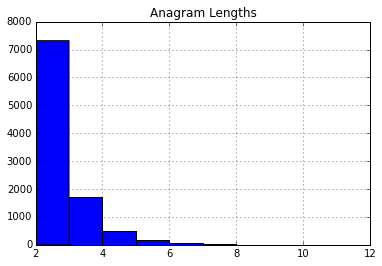

In [7]:
print("Question 3: Use matplotlib (or Excel) to visualize a histogram of the size of the anagrams.")
import matplotlib.pyplot as plt
%matplotlib inline
df_anagram_lengths = pd.DataFrame(anagram_lengths, columns=['Anagram Lengths'])

df_anagram_lengths.hist()
print(df_anagram_lengths.describe())

In [8]:
anagrams_no_punc = []
for i in range(0,len(anagrams)):
    anagrams_no_punc.append(str(anagrams[i]).translate(str.maketrans('','', "[]'' ")))
    
len(anagrams_no_punc)
#print(str(anagrams[0]).translate(str.maketrans('','', "[]'' ")))

9796

In [33]:
#Question 4
df=pd.DataFrame()
df = pd.DataFrame(anagram_keys, columns=['Anagram'])
df['Number_of_Anagrams'] = anagram_lengths
#Numbers are as int64 type which does not work well with sqlite
df['Number_of_Anagrams'] = df['Number_of_Anagrams'].astype(int)
df['Anagram_Words'] = pd.DataFrame(anagrams_no_punc)


In [20]:
df.head(20)

,Anagram,Number_of_Anagrams,Anagram_Words
0,aaghmnoy,2,"hogmanay,mahogany"
1,ailopsst,2,"apostils,topsails"
2,dmosu,2,"doums,modus"
3,frsu,2,"furs,surf"
4,aeipsst,4,"pasties,patsies,petsais,tapises"
5,aglru,2,"gular,rugal"
6,deginn,2,"ending,ginned"
7,denor,2,"drone,redon"
8,adoty,2,"toady,today"
9,acddist,2,"addicts,didacts"


In [52]:
"""
import sqlite3
conn = sqlite3.connect("C:\\Users\\ryan.shuhart\\Google Drive\\SMU\\Class Work\\Fall 2015"\
                    "\\File Organization and Database Management\\Homeworks\HW4\\database.db")
c = conn.cursor()
-
#Create table
#c.execute('''CREATE TABLE data

#(Anagram Text, Number_of_Anagrams INT, Anagram_Words Text)''')
#c.execute('INSERT INTO data VALUES ("test",1,"rest")')
conn.commit()
"""

In [53]:
"""
#tuples = [tuple(x) for x in subset.values]
tupes=[]
for x in df.itertuples(index=False):
    tupes.append(x)
"""

In [74]:
from sqlalchemy import create_engine
db_path = "C:\\Users\\ryan.shuhart\\Google Drive\\SMU\\Class Work\\Fall 2015\\File Organization and Database Management\\Homeworks\HW4\\database.db"
engine = create_engine("sqlite:///"+db_path)

df.to_sql('data',engine)

In [75]:
#Using alternative to sqlalchemy to test data can be read
import sqlite3
conn = sqlite3.connect(db_path)
c = conn.cursor()
c.execute('SELECT * FROM data')
print(c.fetchall())
conn.close()

[(0, 'aaghmnoy', 2, 'hogmanay,mahogany'), (1, 'ailopsst', 2, 'apostils,topsails'), (2, 'dmosu', 2, 'doums,modus'), (3, 'frsu', 2, 'furs,surf'), (4, 'aeipsst', 4, 'pasties,patsies,petsais,tapises'), (5, 'aglru', 2, 'gular,rugal'), (6, 'deginn', 2, 'ending,ginned'), (7, 'denor', 2, 'drone,redon'), (8, 'adoty', 2, 'toady,today'), (9, 'acddist', 2, 'addicts,didacts'), (10, 'adeiprst', 2, 'rapidest,traipsed'), (11, 'aceilpst', 2, 'septical,tieclasp'), (12, 'beglrsu', 3, 'buglers,bulgers,burgles'), (13, 'cdeoy', 2, 'coyed,decoy'), (14, 'acdefrt', 2, 'crafted,fracted'), (15, 'aaimrt', 2, 'amrita,tamari'), (16, 'degilns', 3, 'dingles,engilds,singled'), (17, 'bekrsu', 2, 'burkes,busker'), (18, 'alst', 5, 'alts,last,lats,salt,slat'), (19, 'ceeinrtu', 2, 'ceinture,enuretic'), (20, 'ginoppst', 2, 'stopping,toppings'), (21, 'deilrss', 2, 'sidlers,sliders'), (22, 'ceerst', 5, 'certes,erects,resect,secret,terces'), (23, 'aainpt', 3, 'patina,pinata,taipan'), (24, 'emno', 3, 'meno,nome,omen'), (25, 'aa

In [76]:
names = list(map(lambda x: x[0], c.description))
print(names)

['index', 'Anagram', 'Number_of_Anagrams', 'Anagram_Words']


In [77]:
#Question 4 - How many unique anagrams are in the scrabble word list?
sql = "SELECT DISTINCT Anagram FROM data"
pd.read_sql_query(sql, engine)

,Anagram
0,aaghmnoy
1,ailopsst
2,dmosu
3,frsu
4,aeipsst
5,aglru
6,deginn
7,denor
8,adoty
9,acddist
